## ¿Qué es _Machine Learning (ML)_?


![alt](imgs/models.png)



### modelos analíticos de siempre

![alt](imgs/analytical-models.png)

### modelos derivados de los datos

![alt](imgs/model-creation.png)


### modelos derivados de los datos (en realidad)

![alt](imgs/model-template.png)

### Pero la metodología no cambia

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

![alt](imgs/science_engineering.png)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca que **calibrar modelos** respecto a unos datos concretos.

# ¿Qué es un modelo derivado de los datos?

**Caso ideal**: Sabemos las distribuciones de las que vienen los datos. $\Rightarrow$ podemos calcular analíticamente nuestro modelo.

- ¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?


#### cálculo analítico de los errores de clasificación

**Caso en 2D**

- en 2D, un modelo de clasificación **es una frontera** en el plano

- **supongamos** que tenemos acceso a las distribuciones de las que surgen los datos $\rightarrow$ podemos muestrear tantas veces como queramos

- ¿cuál es la frontera que produce menos error de clasificación?

- $\epsilon$ es el error de clasificación calculado analíticamente **con la frontera óptima** porque conocemos las distribuciones que generan los datos.
- $\hat{\epsilon}$ es el error de clasificacón calculado con la muestra de datos y **con la frontera óptima** (conocida también como _frontera bayesiana_).

### observa las siguientes poblaciones de ejemplo

- supongamos tenemos acceso a las **distribuciones de las que vienen los datos** (en realidad, nunca es así!!!)


In [1]:
import mlutils
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
params = mlutils.interact_distributions()

In [9]:
import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

observa que podemos calcular el **error bayesiano** analíticamente $\rightarrow$ **NO NECESITAMOS LOS DATOS**

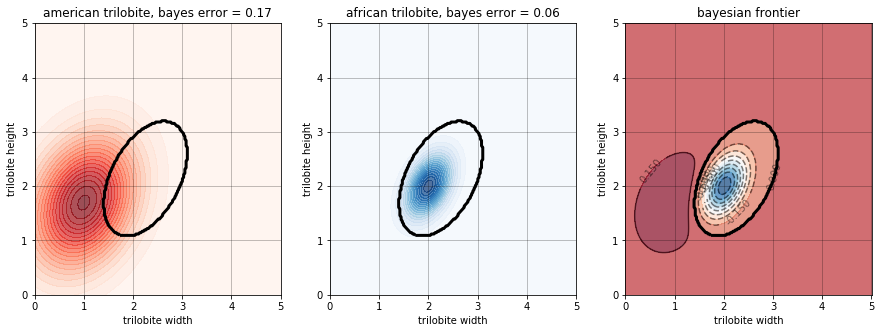

In [11]:
x0,y0,s0,d0,x1,y1,s1,d1 = params
mc = mlutils.Example_Bayes2DClassifier(mean0=[x0.value, y0.value], cov0=[[s0.value, d0.value], [d0.value, s0.value+d0.value]],
                                       mean1=[x1.value, y1.value], cov1=[[s1.value, d1.value], [d1.value, s1.value+d1.value]])
mc.plot_contours(show_bayesians=True)


### **Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

haz los siguientes experimentos:

- separa los centros de las distribuciones de cada clase (`mean0`, `mean1`).
- aumenta y disminuye las matrices de covarianza.
- aumenta y disminuye el número de muestras.


- observa la estabilidad de $\hat{\epsilon}$ respecto a $\epsilon$ según ambas clases están más mezcladas o hay más o menos datos.

en general **SOLO TENEMOS UNA MUESTRA** de los datos, porque no tenemos conocimiento de las distribuciones que los generan. Los métodos de **estadística** y de **machine learning** están diseñados para esta situación.

Ejecuta la siguiente celda y pregúntate cada vez, **¿qué frontera establecerías con los datos que ves?**.

Fíjate que tenemos distintas muestras de una misma disitribución de base. Es decir, **la realidad detrás de estos datos siempre es la misma**.

**Aumenta** el número de muestras y hazte cada vez la misma pregunta.

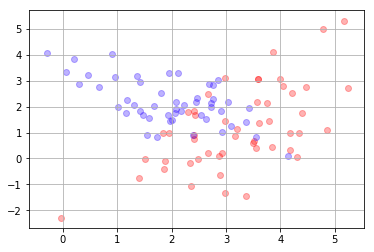

In [5]:
X,y = mc.sample(100)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

observa donde queda la **frontier bayesiana**

## ¿cómo podemos llegar  a la frontera bayesiana usando solo los datos**

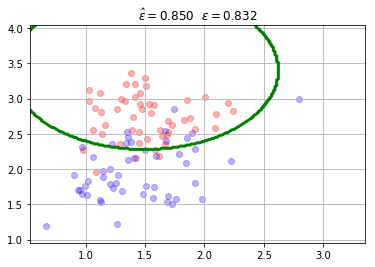

In [9]:
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title("$\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid()

### Los algoritmos de machine learning:

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana.

O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.
- la frontera se representa con una red neuronal.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

### observa cómo un clasificador lineal aproxima la frontera con diferentes tamaños de muestras

- cambia el parámetro `n_samples` y experimenta con el siguiente código.
- usa luego estimadores distintos. P.ej.

        estimator = SVC(gamma=1)
        estimator = RandomForestClassifier()
        estimator = SVC(gamma=100)
        
Hazte las siguientes preguntas:

- ¿qué complejidad es capaz de capturar un estimador?

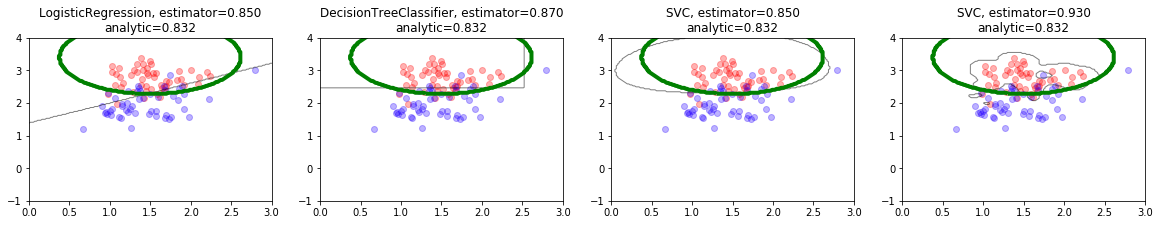

In [10]:
estimators = [LogisticRegression(), DecisionTreeClassifier(max_depth=2),SVC(gamma=1), SVC(gamma=100)]
plt.figure(figsize=(len(estimators)*5,3))
for i,estimator in enumerate(estimators):
    plt.subplot(1,len(estimators),i+1)
    mlutils.plot_estimator_border(mc, estimator, X=X, y=y, mins=[0,-1], maxs=[3,4], legend=False)

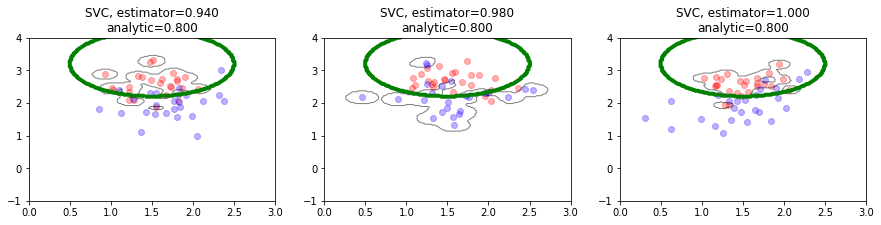

In [25]:
n_samples = 50
estimator = LogisticRegression()
estimator = SVC(gamma=100)
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    mlutils.plot_estimator_border(mc, estimator, mins=[0,-1], maxs=[3,4], n_samples=n_samples, legend=False)

hacemos ahora el experimento más exhaustivo repitiendo 20 veces el siguiente proceso:

- se muestrea el dataset (recuerda que **excepcionalmente** tenemos acceso a las distribuciones que generan los datos y por tanto podemos hacer esto).
- se calcula la fronter de clasificación obtenida por el estimador usando el dataset muestreado.
- se pinta esta frontera (en negro).
- en verde se muestra la **frontera bayesiana**.

100% (4 of 4) |##########################| Elapsed Time: 0:00:08 Time:  0:00:08


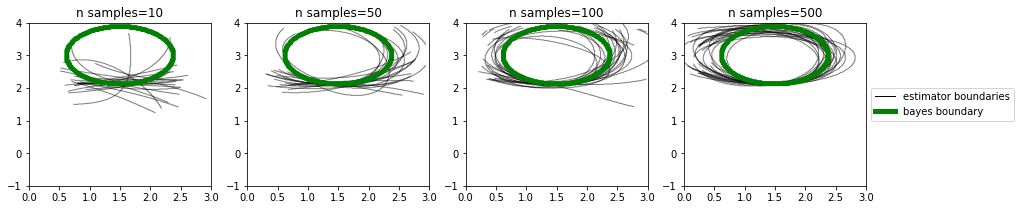

In [24]:
mlutils.sample_borders(mc, estimator, samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])